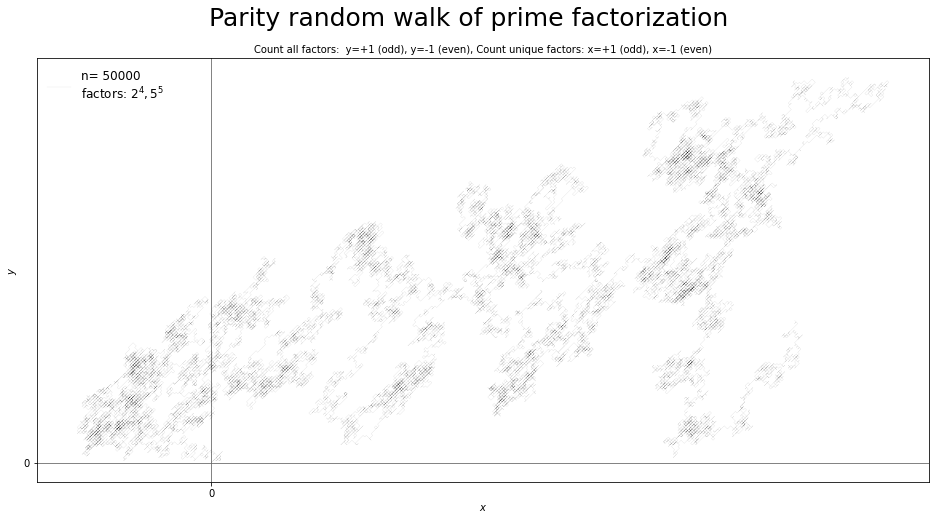

In [3]:
import numpy as np
import matplotlib.pyplot as plt1
from sympy.ntheory import factorint
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

fig, ax1a = plt1.subplots(1, figsize=(16, 8))
ax1a.clear()

#Number of numbers to factorize
p=50000

#maximum plotpoints in graph, recommended <2.000.000
s=2000000

if (s>=p):
    s=p

modu=int(p/s)

#Set counter zero and create zero arrays plot data
c=0
xcs=np.zeros(s+1)
ycs=np.zeros(s+1)
xs=np.zeros(s+1)
ys=np.zeros(s+1)

#Images to save in walk (parital walk, red), images=0 no partial random walks
images=0

#Set cumulative biffer value to 0
xm=0
ym=0

#Spacing tickmarks x and y axis
tick=2000

for n in range(p+1):
    
    #Prime Factors
    a=factorint(n)
    
    #Unique Prime Factors
    pf=list(a)

    #All Exponents
    exp=list(a.values())
    
    #Count all Prime Factors (including duplicates) if even -1 odd +1
    if np.sum(exp)%2==0:
        yn=-1
    else:
        yn=1
    
    #Add results to array, including cumulative steps
    ym=ym+yn

    #Count all unique Prime Factors (including duplicates) if even -1 odd +1
    pf=np.size(pf)
    if pf%2==0:
        xn=-1
    else:
        xn=1

    #Add results to array, including cumulative steps
    xm=xm+xn 

    #Add results to shortened table with maximum of s elements
    if (n%modu==0):
        xcs[c]=xm
        ycs[c]=ym

        xs[c]=xn
        ys[c]=yn

        c=c+1
        
        


#Create graph label for last point partial random walk
a=factorint(int(p))

#Unique Prime Factors
pf=np.char.array(np.array(list(a),dtype=str))

#Create Label Exponents, create Latex string with primefactors and exponents
exp=np.char.array(np.array(list(a.values()),dtype=str))
fac='$' + (', '.join(pf+'^{' + exp + '}')) + '$'
l='n= ' + str(int(p)) + '\nfactors: ' + str(fac)

#Plot total random walk
ax1a.plot(xcs,ycs, marker='', color='black', linestyle='-', markersize=0,linewidth=0.04,label=l)
ax1a.set_xlabel('$x$',fontsize=10)
ax1a.set_ylabel('$y$',fontsize=10)
ax1a.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)
ax1a.ticklabel_format(axis='x', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax1a.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax1a.xaxis.set_major_locator(MultipleLocator(tick))
ax1a.yaxis.set_major_locator(MultipleLocator(tick))
ax1a.legend(loc='upper left',fontsize=12,markerscale=1,frameon=False)

plt1.title('Count all factors:  y=+1 (odd), y=-1 (even), Count unique factors: x=+1 (odd), x=-1 (even)', fontsize=10)
plt1.suptitle('Parity random walk of prime factorization', fontsize=25,y=0.96)
plt1.gca().set_aspect('equal', adjustable='box')
plt1.savefig('Random Walk00000.png', dpi=300, bbox_inches='tight')

if images>0:
    for q in range(images):

        count=int((q+1)*s/images)

        #print(count)    
        a=factorint(int(count*p/s))


        #Unique Prime Factors
        pf=np.char.array(np.array(list(a),dtype=str))

        #Exponents, create Latex string with primefactors and exponents
        exp=np.char.array(np.array(list(a.values()),dtype=str))
        fac='$' + (', '.join(pf+'^{' + exp + '}')) + '$'

        #Create graph label for last point partial random walk
        l='n= ' + str(int(count*p/s)) + '\nfactors: ' + str(fac) + '\nparity: x=' +  str(xs[(count)]) + ', y=' +  str(ys[(count)]) + '\ncumulative: x=' +  str(xcs[(count)]) + ', y=' +  str(ycs[(count)]) 

        #Plot black total walk and partial red 
        ax1a.clear()
        ax1a.plot(xcs,ycs, marker='', color='black', linestyle='-', markersize=0,linewidth=0.04)
        ax1a.plot(xcs[0:(count)],ycs[0:(count)], marker='', color='red', linestyle='-', markersize=0,linewidth=0.05)
        ax1a.plot(xcs[(count)],ycs[(count)], marker='o', color='red', linestyle='-', markersize=3,linewidth=0,label=l)

        ax1a.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)
        ax1a.xaxis.set_major_locator(MultipleLocator(tick))
        ax1a.yaxis.set_major_locator(MultipleLocator(tick))
        ax1a.ticklabel_format(axis='x', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
        ax1a.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
        ax1a.legend(loc='upper left',fontsize=12,markerscale=1,frameon=False)
        ax1a.set_xlabel('$x$',fontsize=10)
        ax1a.set_ylabel('$y$',fontsize=10)

        plt1.title('Count all factors:  y=+1 (odd), y=-1 (even), Count unique factors: x=+1 (odd), x=-1 (even)', fontsize=10)
        plt1.suptitle('Parity random walk of prime factorization', fontsize=25,y=0.96)
        plt1.gca().set_aspect('equal', adjustable='box')
        plt1.savefig('Random Walk' + str("%05d" % (q+1)) +'.png', dpi=300, bbox_inches='tight')
